In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as ns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.multiclass import OneVsRestClassifier

In [3]:
df=pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#to delete the columns 
df=df.drop(columns=['Id'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#to discribe stats about data 
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#to display basi infr 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#to display sample of each class 
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [8]:
#check for null values 
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

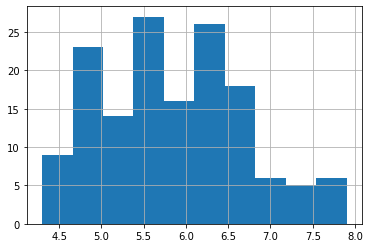

In [9]:
#to plot histogram
df['SepalLengthCm'].hist() 

<AxesSubplot:>

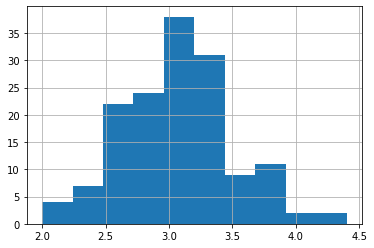

In [10]:
df['SepalWidthCm'].hist() 

<AxesSubplot:>

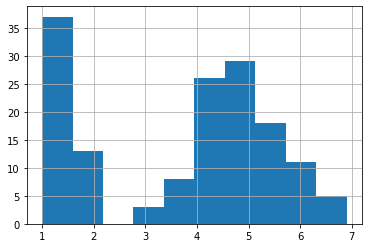

In [11]:
df['PetalLengthCm'].hist() 

<AxesSubplot:>

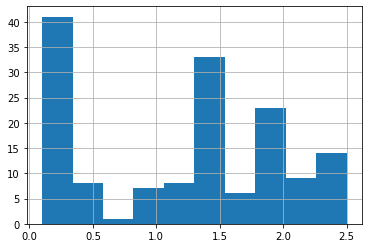

In [12]:
df['PetalWidthCm'].hist() 

In [13]:
#scatterplot 
colors=['red','orange','blue']
species_value=['Iris-virginica','Iris-versicolor','Iris-setosa'] 

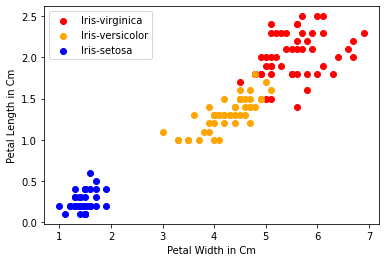

In [14]:
for i in range(3):
    x=df[df['Species']==species_value[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species_value[i])
    
plt.ylabel('Petal Length in Cm')
plt.xlabel('Petal Width in Cm')
plt.legend()

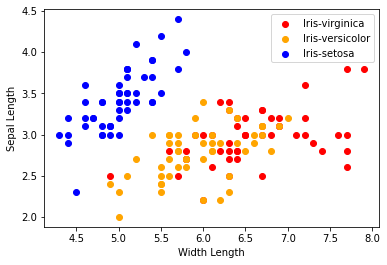

In [15]:
for i in range(3):
    x=df[df['Species']==species_value[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species_value[i])
    
plt.ylabel('Sepal Length')
plt.xlabel('Width Length')
plt.legend()

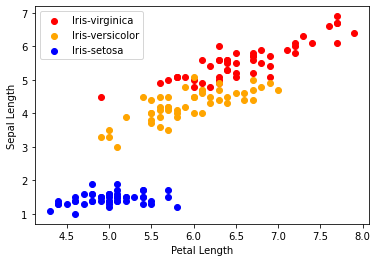

In [16]:
for i in range(3):
    x=df[df['Species']==species_value[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species_value[i])
    
plt.ylabel('Sepal Length')
plt.xlabel('Petal Length')
plt.legend()

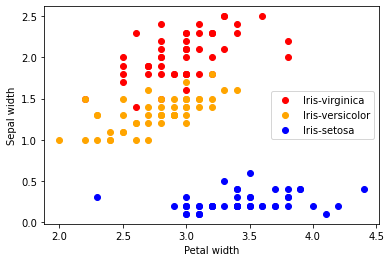

In [17]:
for i in range(3):
    x=df[df['Species']==species_value[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species_value[i])
    
plt.ylabel('Sepal width')
plt.xlabel('Petal width')
plt.legend()
    

In [18]:
#to display correlation 
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

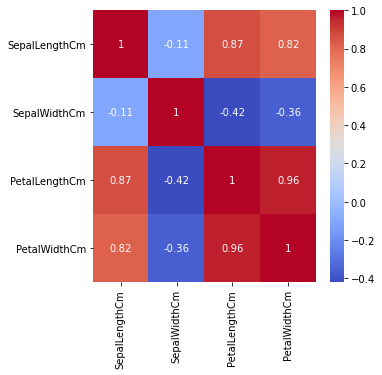

In [19]:
#to display correlation in heatmap
corr=df.corr()
fig, ax=plt.subplots(figsize=(5,5))
ns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [20]:
le=LabelEncoder()

In [21]:
df['Species']=le.fit_transform(df['Species'])

In [22]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
# LogisticRegression
Lr_model=LogisticRegression()
# KNeighborsClassifier
Kn_model=KNeighborsClassifier()
#DecisionTreeClassifier
Dt_model=DecisionTreeClassifier()

In [24]:
from sklearn.model_selection import train_test_split 
#train 70
#test 30
x=df.drop(columns=['Species'])
y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [25]:
#performace metrics
def predicted_results(y_test,y_pred,model_name):
    print("Prediction results by "+model_name)
    recall = recall_score(y_test, y_pred_by_Lr, average="macro")
    recall=recall*100
    print('Recall: %.3f' % recall)
    precision = precision_score(y_test, y_pred_by_Lr, average="macro")
    precision=precision*100
    print('Precision: %.3f' % precision)
    f1 = f1_score(y_test, y_pred_by_Lr, average="macro")
    f1=f1*100
    print('f1: %.3f' % f1)
    accuracy = accuracy_score(y_test, y_pred_by_Lr)
    accuracy=accuracy*100
    print('Accuracy: %.3f' % accuracy)
    
    return 

In [26]:
#train the model 
Lr_model.fit(x_train, y_train)
#print metrices to get performance 
#print("Accuracy=",Lr_model.score(x_test,y_test)*100)
#confusion matrix or LR 
y_pred_by_Lr=Lr_model.predict(x_test)
print(confusion_matrix(y_test,y_pred_by_Lr))
predicted_results(y_test,y_pred_by_Lr,"Linear Regression")

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Prediction results by Linear Regression
Recall: 98.148
Precision: 97.222
f1: 97.598
Accuracy: 97.778


In [27]:
#import k-nearest neighbor 
Kn_model=KNeighborsClassifier()
#train the model 
Kn_model.fit(x_train, y_train)
#print metrices to get performance 
#print("Accuracy=",Kn_model.score(x_test,y_test)*100)
y_pred_by_Kn=Kn_model.predict(x_test)
confusion_matrix(y_test,y_pred_by_Kn)
predicted_results(y_test,y_pred_by_Kn,"kNeighbors")

Prediction results by kNeighbors
Recall: 98.148
Precision: 97.222
f1: 97.598
Accuracy: 97.778


In [28]:
#DecisionTreeClassifier
Dt_model=DecisionTreeClassifier()
#train the model 
Dt_model.fit(x_train, y_train)
#print metrices to get performance 
#print("Accuracy=",Dt_model.score(x_test,y_test)*100)
y_pred_by_Dt=Lr_model.predict(x_test)
confusion_matrix(y_test,y_pred_by_Dt)
predicted_results(y_test,y_pred_by_Kn,"Decision Tree")

Prediction results by Decision Tree
Recall: 98.148
Precision: 97.222
f1: 97.598
Accuracy: 97.778


In [29]:
#Binarize labels in a one-vs-all fashion. used to covert labels to binary
y = label_binarize(y, classes=[0,1,2])

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [31]:
# classifier
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

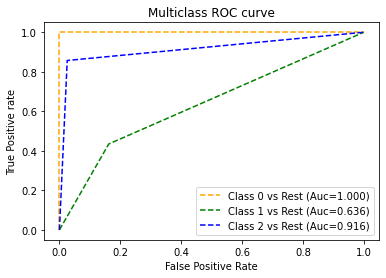

In [32]:
n_class = 3
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc={}
n_class = 3
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test[:,i], y_pred[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest (Auc=%0.3f)'%roc_auc[0]) 
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest (Auc=%0.3f)'%roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest (Auc=%0.3f)'%roc_auc[2])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 